# Part 2: Segmentation Study

In [1]:
#Loading Data
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df=pd.read_csv('au_train.csv',skipinitialspace=True)
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
21171,30,Private,217296,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,<=50K
10432,22,Self-emp-inc,150683,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,24,United-States,<=50K
19816,31,Private,111363,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
7506,32,Private,400535,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,3781,0,40,United-States,<=50K
7318,24,Private,191948,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,0,30,United-States,<=50K


# Correlation Measurement
### To understand the connection between the attributes with income, I first plotted a Pearson correlation matrix for the numerical data

<AxesSubplot:>

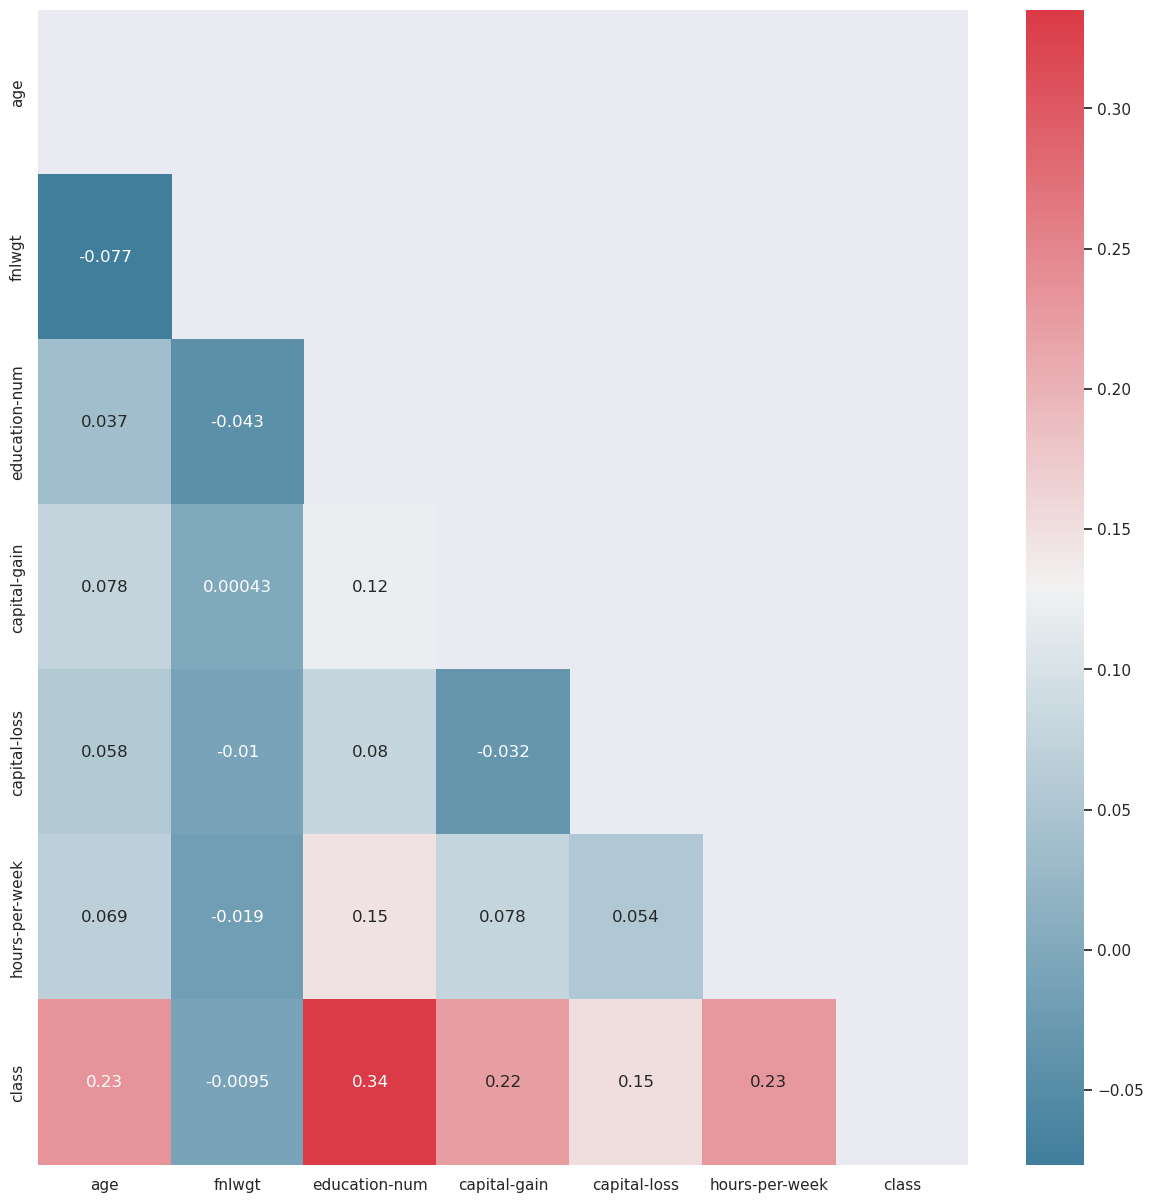

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

targetEncoder = LabelEncoder()
df['class']=targetEncoder.fit_transform(df['class'])

# Computing Correlation between different variables
corr = df.corr()

plt.figure(figsize = (15, 15))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setting a custom diverging colormap
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Drawing the correlation matrix heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

### Although the attributes do not have very strong correlation with income (i.e. 'class'), it can be seen that '__education-num__', '__age__', and '__hours-per-week__' still show some degree of correlation

# Feature Selection
To obtain a better understanding of the features, I plotted:<br>
A) the distribution of each attibute and<br>
B) the split of the incomes for each attibute.<br>

## Insights:

Upon a close inspection of the given data and the plots, it can be observed that:<br>
i) __'workclass'__, __'fnlwgt'__, __'capital-gain'__, __'capital-loss'__, and __'native-country'__  have minimal influence on income. Thus, I decided not to use these attibutes.<br>
ii) __'race'__ is oversampled with White and Black classes and is not indicative of much useful information<br>
iii) __'education'__ is just the categorical version of '__education-num__'; so keeping either one should suffice<br>
iv) __'relationship'__ is redundant with __'marital-status'__ ; apparently __'marital-status'__ is a more inclusive attribute<br>
 

To make the final selection of features, I made the following decisions:<br>
i) I chose __'age'__, __'sex'__, __'education-num__, __'marital-status'__, __'hours-per-week'__, and __'occupation'__ as the key features since they have significant influences on the income<br>
iii) Even though __'sex'__ is dominated by 'Male' classes, it still show a significance in determining income<br>

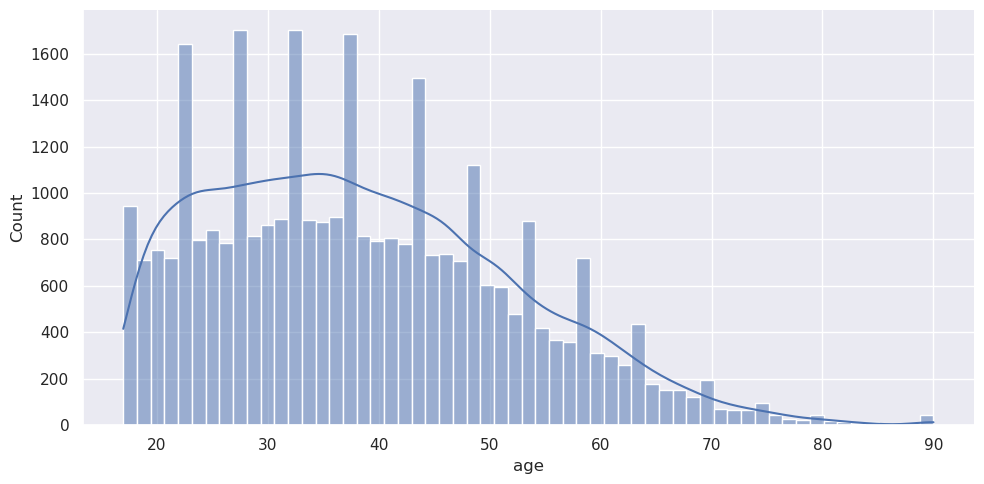

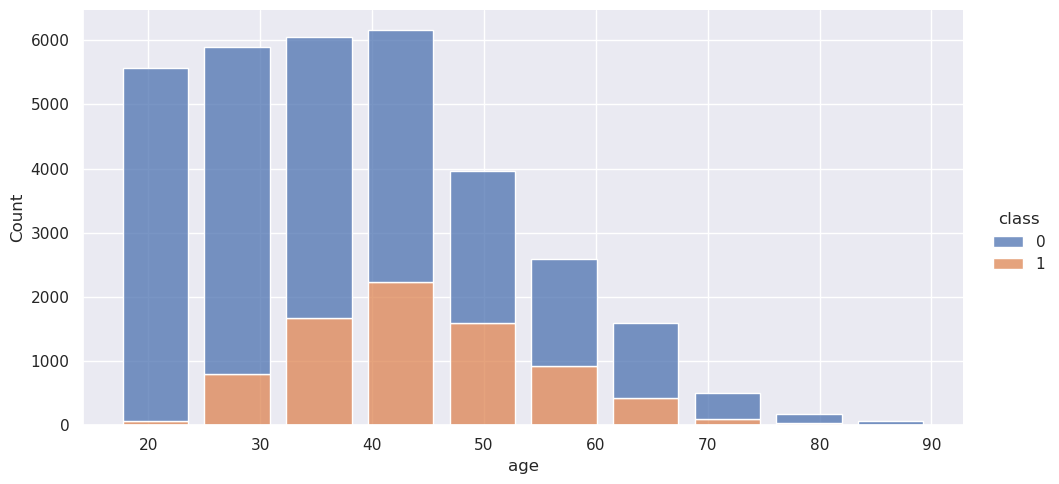

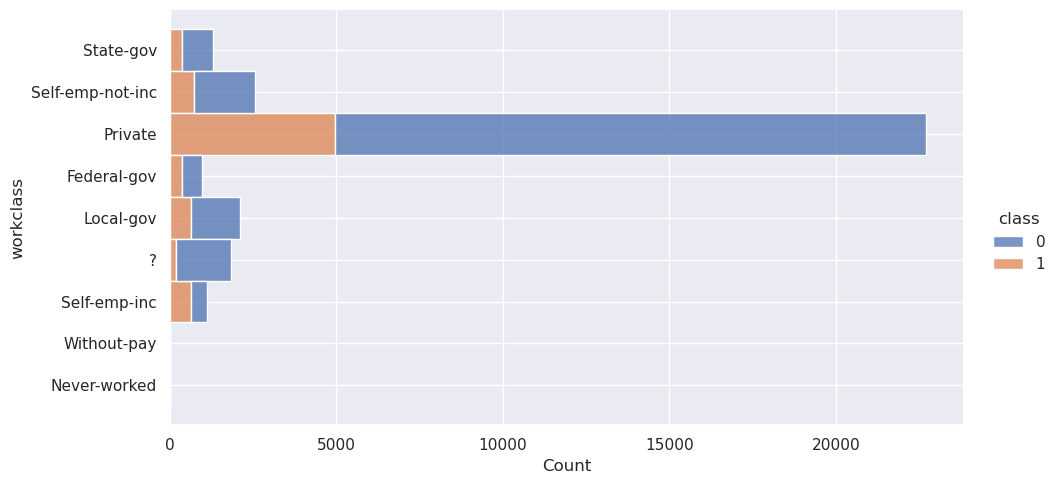

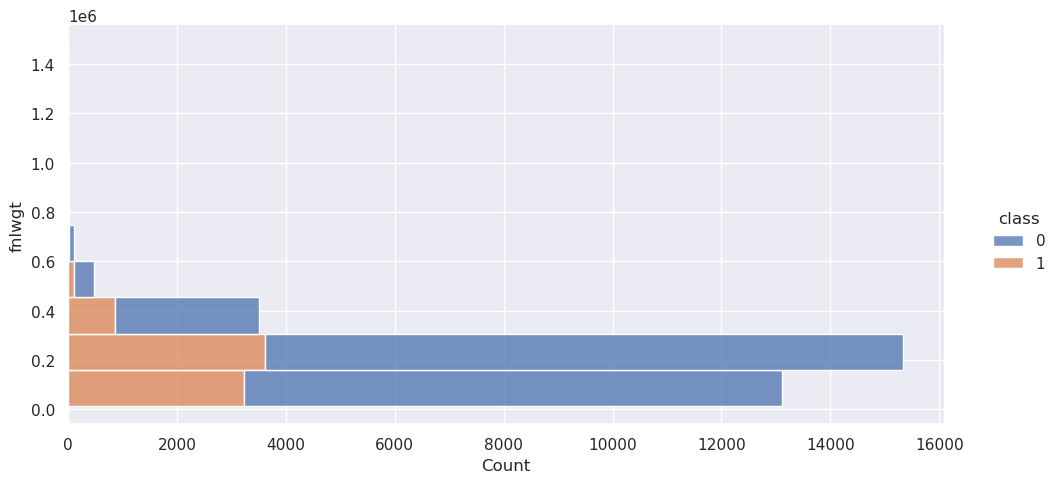

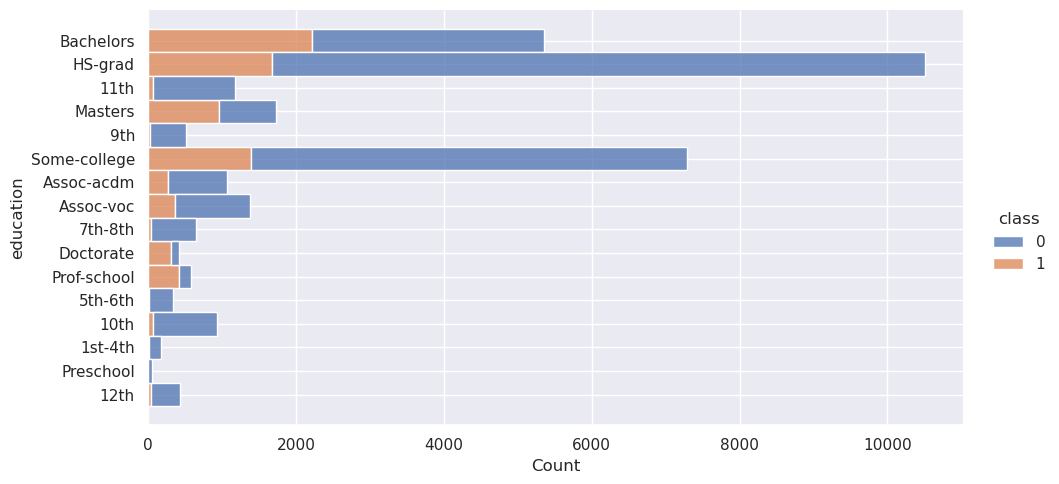

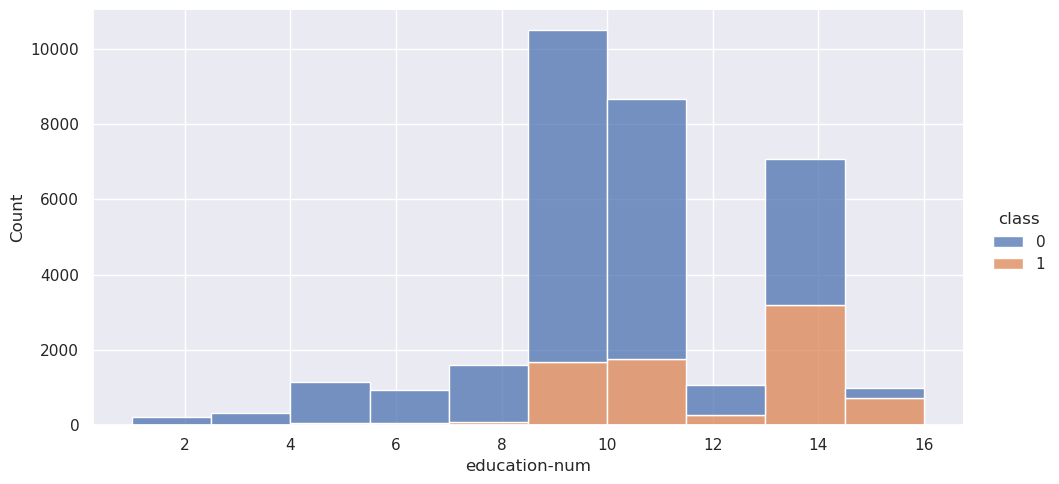

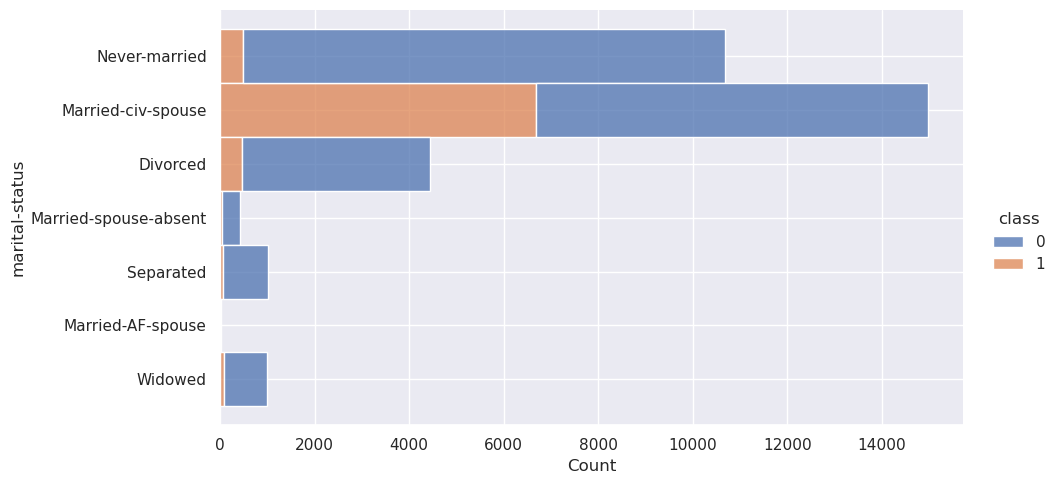

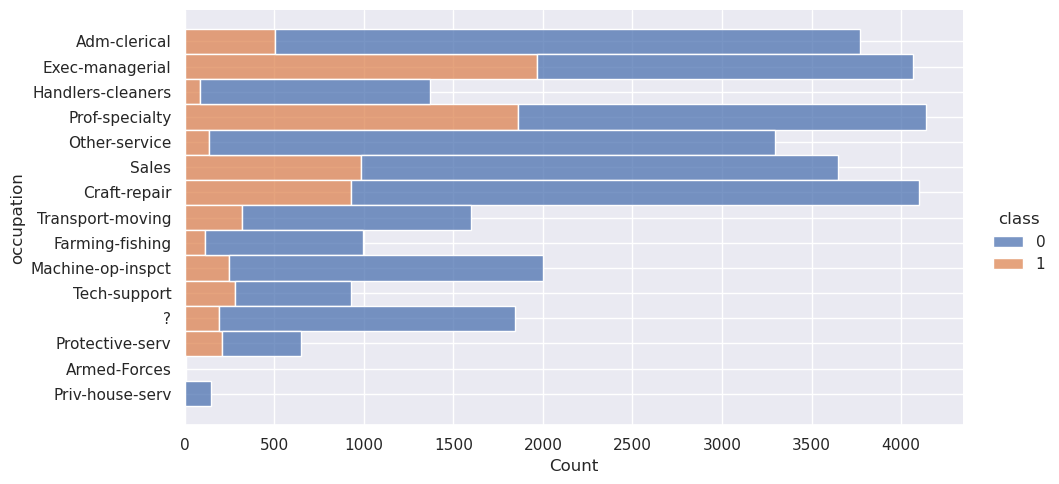

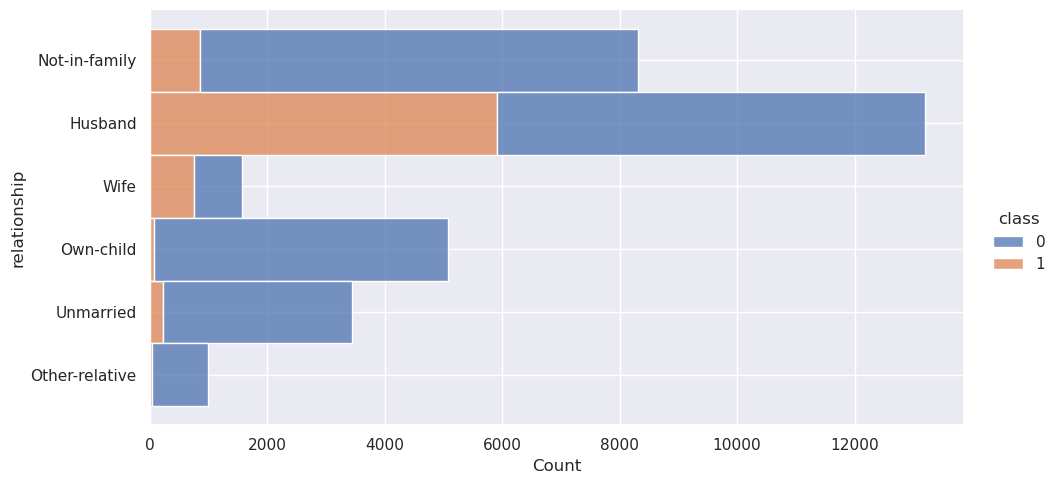

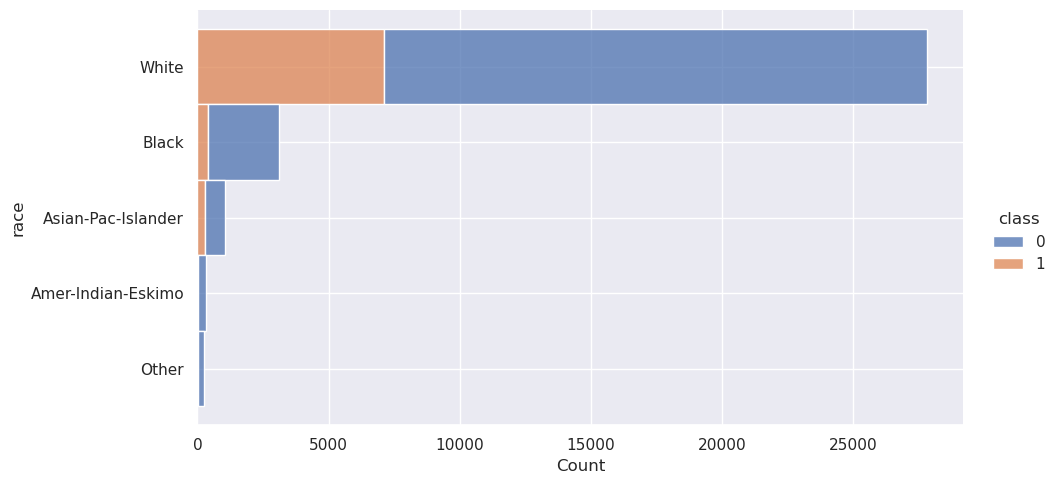

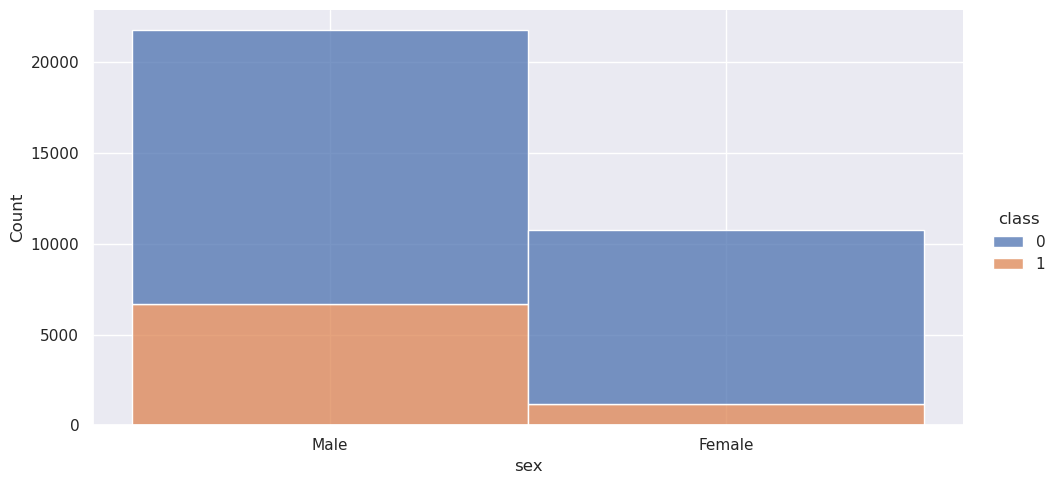

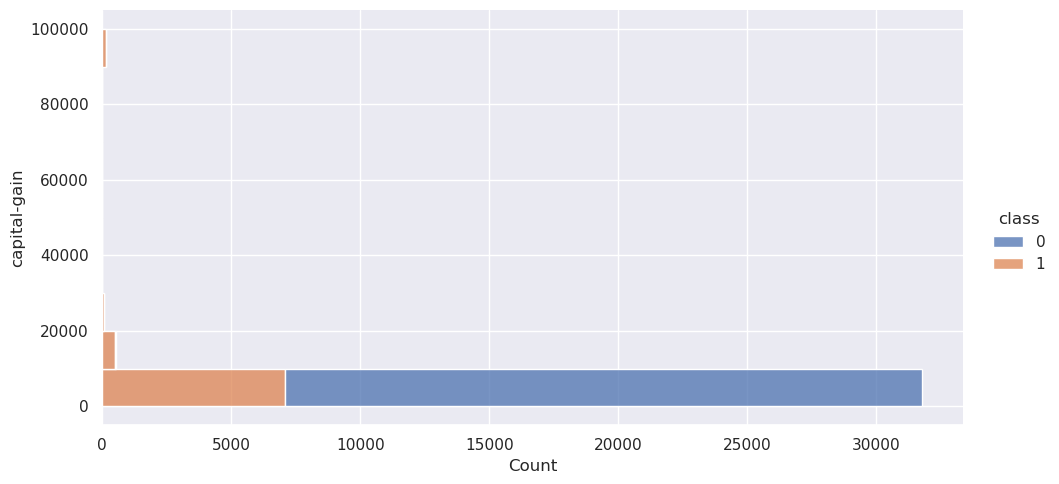

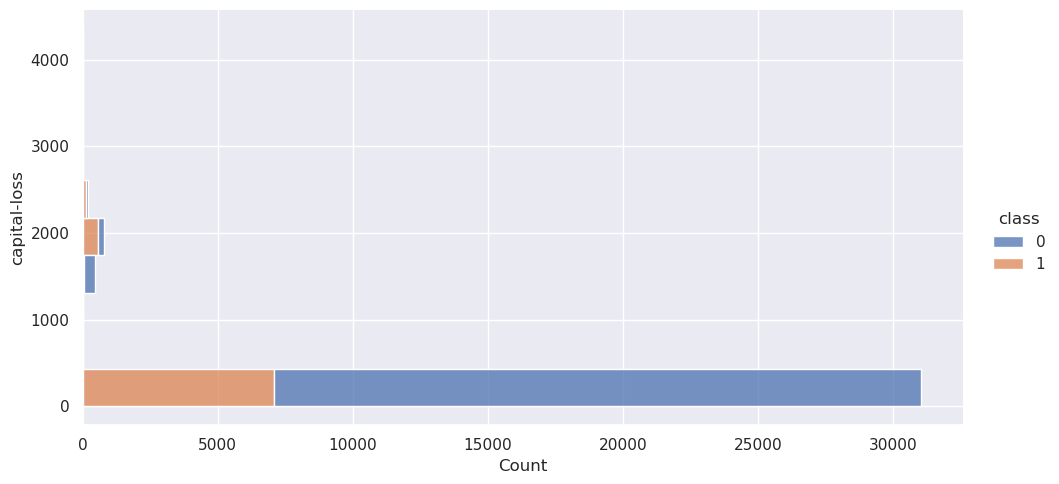

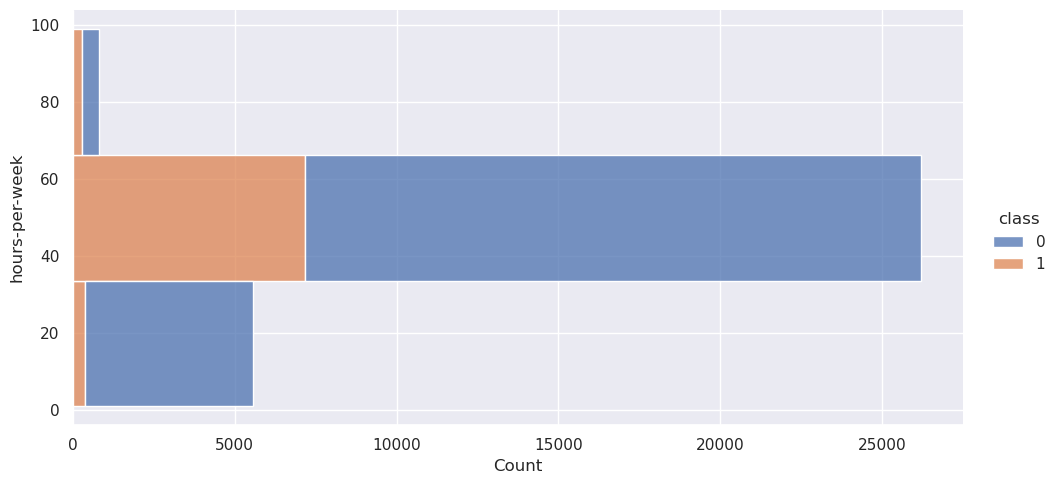

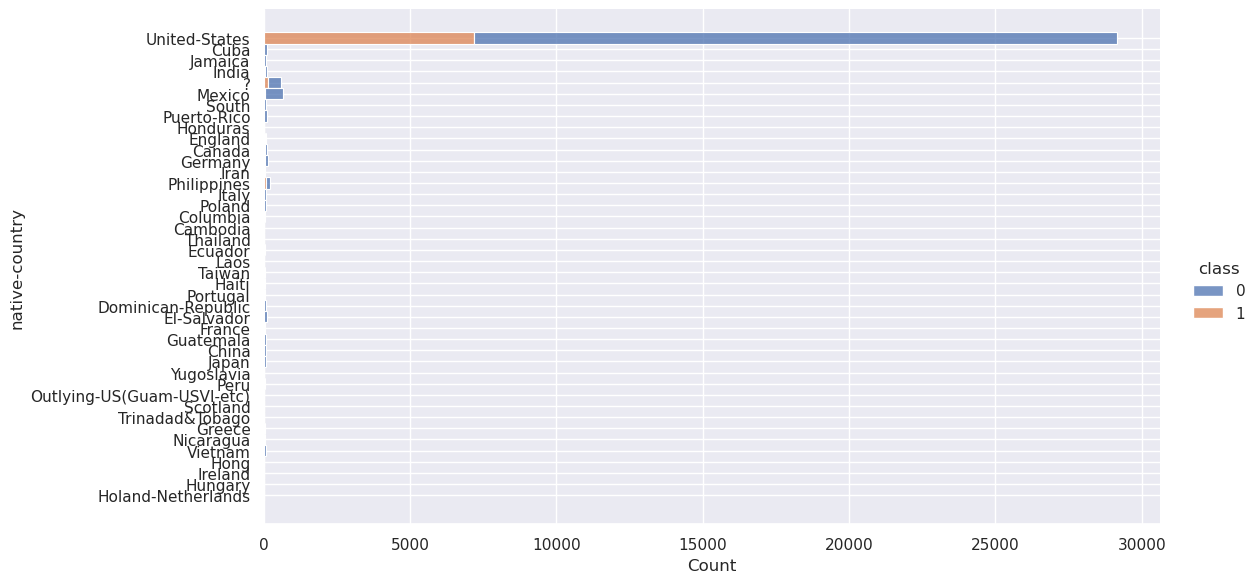

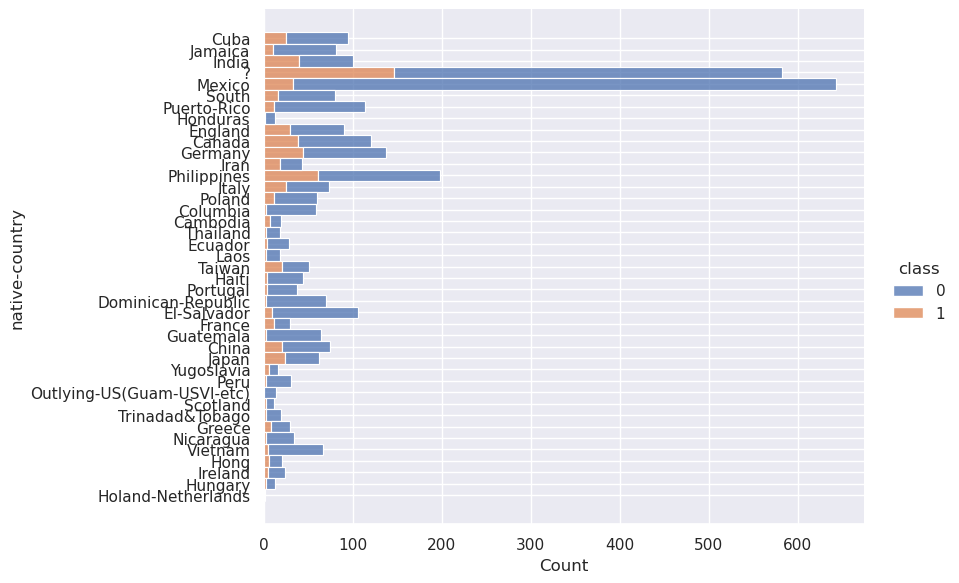

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='whitegrid')
sns.set()

#Plotting dist of each attribute and split of incomes
sns.displot(df, x="age",kde=True,height=5,aspect=2)
sns.displot(df, x="age",multiple="stack",hue="class",shrink=.8,bins=10,height=5,aspect=2)
sns.displot(df, y="workclass",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, y="fnlwgt",multiple="stack",hue="class", bins=10,height=5,aspect=2)
sns.displot(df, y="education",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, x="education-num",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, y="marital-status",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, y="occupation",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, y="relationship",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, y="race",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, x="sex",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, y="capital-gain",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, y="capital-loss",multiple="stack",hue="class",bins=10,height=5,aspect=2)
sns.displot(df, y="hours-per-week",multiple="stack",hue="class",bins=3,height=5,aspect=2)
sns.displot(df, y="native-country",multiple="stack",hue="class", bins=10,height=6,aspect=2)
mask=df[df["native-country"]!="United-States"]
sns.displot(mask, y="native-country",multiple="stack",hue="class", bins=10,height=6,aspect=1.5)
plt.show()

# We notice that while there were no missing data at first glance, the plots show that some of the categorical attributes have "?" as the data. This possibly indicates missing data.